In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("heart_1.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

<Axes: xlabel='target'>

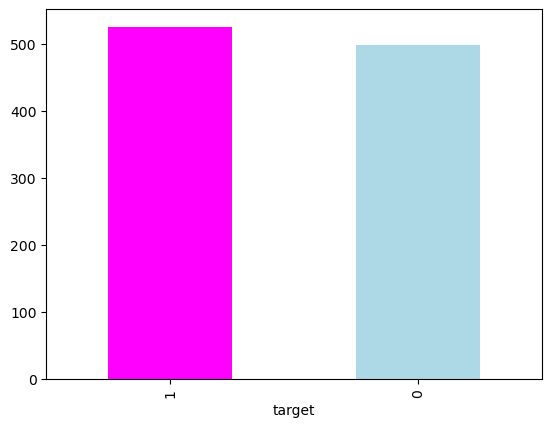

In [8]:
data.target.value_counts().plot(kind='bar', color=['magenta', 'lightblue'])

In [9]:
data.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

Text(0.5, 1.0, "Corelation of all variables with 'Target'")

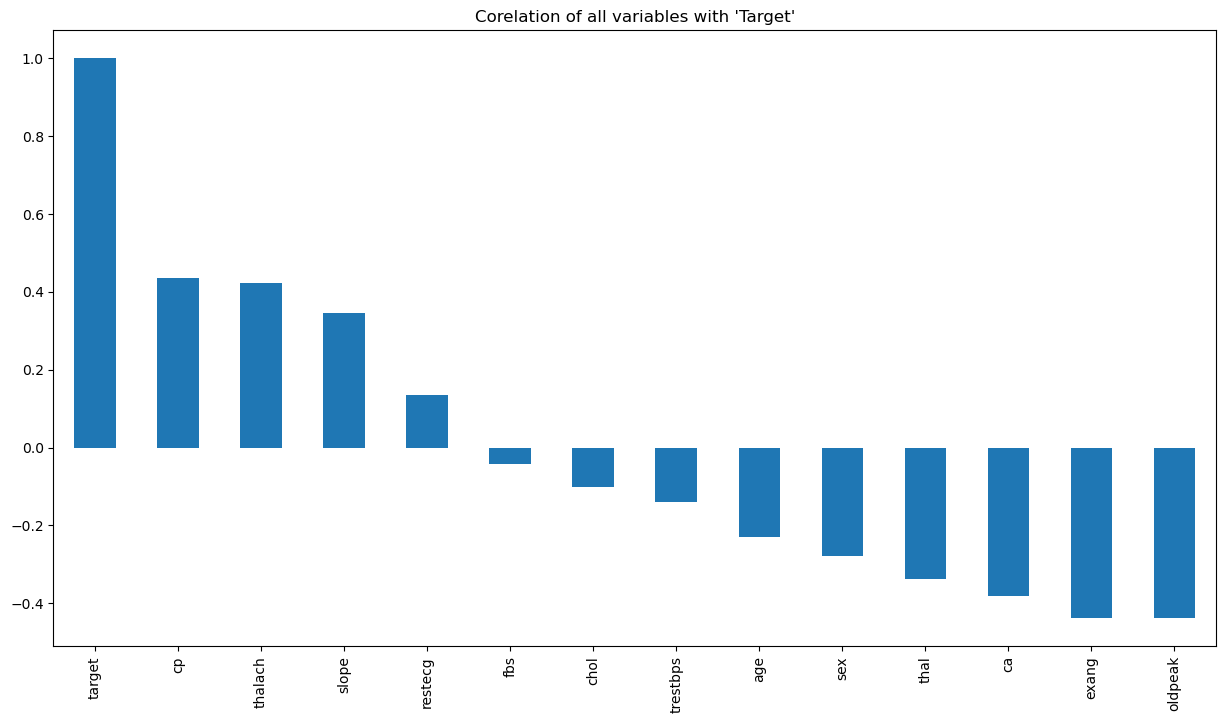

In [10]:
plt.figure(figsize=(15,8))
data.corr()['target'].sort_values(ascending=False).plot(kind="bar")
plt.title("Corelation of all variables with 'Target'")

In [11]:
pd.crosstab(index=data.target, columns=data.sex)

sex,0,1
target,,
0,86,413
1,226,300


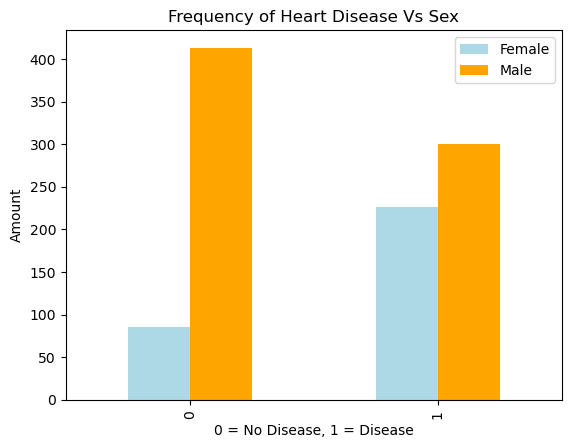

In [12]:
pd.crosstab(data.target, data.sex).plot(kind='bar', color=['lightblue', 'orange'])
plt.title("Frequency of Heart Disease Vs Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])

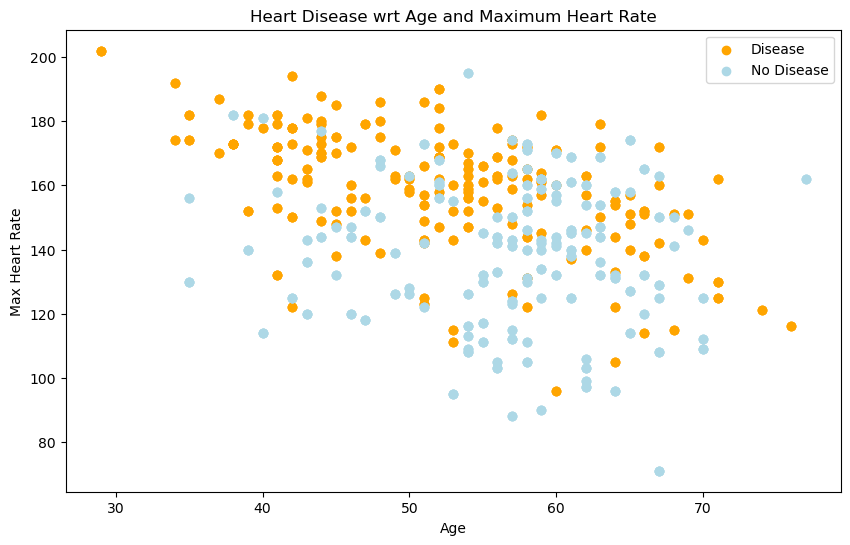

In [13]:
plt.figure(figsize=(10, 6))

plt.scatter(data.age[data.target==1],
            data.thalach[data.target==1],
            c='orange')

plt.scatter(data.age[data.target==0],
            data.thalach[data.target==0],
            c='lightblue')

plt.title("Heart Disease wrt Age and Maximum Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

In [14]:
pd.crosstab(data.cp, data.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


Text(0.5, 0, 'Types of Chest Pain')

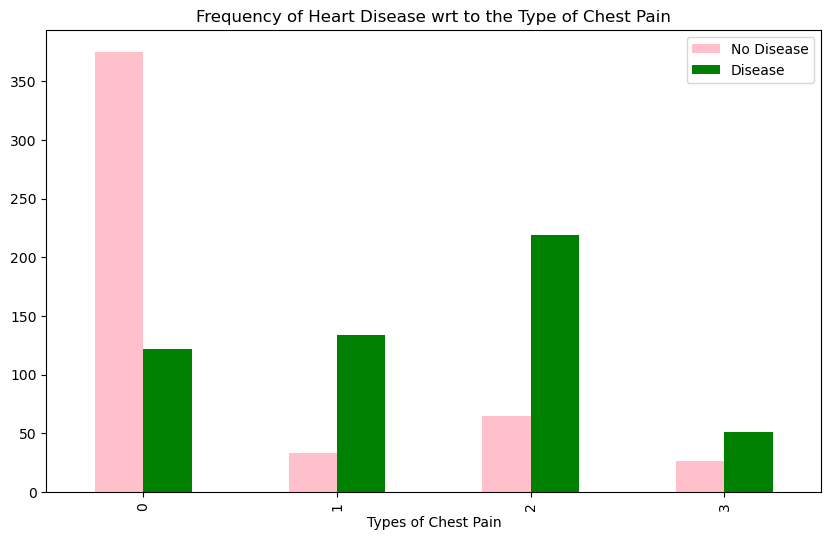

In [15]:
pd.crosstab(data.cp, data.target).plot(kind="bar", figsize=(10, 6), color=["pink", "green"])
plt.title("Frequency of Heart Disease wrt to the Type of Chest Pain")
plt.legend(["No Disease", "Disease"])
plt.xlabel("Types of Chest Pain")

In [16]:
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [17]:
y = data['target'].values
x = data.drop(columns=['target'])

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [20]:
pred_test = model.predict(x_test)
print(metrics.accuracy_score(y_test, pred_test))

0.7853658536585366


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [23]:
pred_test = model.predict(x_test)
print(metrics.accuracy_score(y_test, pred_test))

0.9853658536585366


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [26]:
pred_test = model.predict(x_test)
print(metrics.accuracy_score(y_test, pred_test))

0.7317073170731707
